In [10]:
import uncertainties
from uncertainties.umath import * # sin(), etc.
from uncertainties import ufloat
from uncertainties import unumpy, umath
import math
import matplotlib.pyplot as plt
import math
import numpy as np
import glob



In [11]:
result_files = []
for i in range(100, 200):
    result_files.append(f"/shared/scratch/pc24403/sim_fit_check_each/simfit_output_{i}.txt")

In [12]:

foundCKM = False
idx_CKM = 0
cov_string = ""
param_string = ""
log_strings = []
xp = []
xm = []
yp = []
ym = []

for result_file in result_files:
    idx = 0
    idxs = []
    x = []
    dx = []
    cov = []
    with open(result_file) as f:
        for l in f:
            if 'ValueView' in l:
                a = l.split()
                for i in range(1,7):
                    value = float(a[i][3:])
                    x += [value]
            if 'ErrorView' in l:
                a = l.split()
                for i in range(1,7):
                    error = float(a[i][3:])
                    dx += [error]
                    idxs += [idx]
                    idx +=1
                    idxs += [idx]
                    idx +=1
            log_strings += [l.replace("\n", "")]

    xp.append(ufloat(x[0], dx[0]))
    xm.append(ufloat(x[2], dx[2]))
    yp.append(ufloat(x[1], dx[1]))
    ym.append(ufloat(x[3], dx[3]))

In [13]:
x_exp = [-0.0897, -0.0110, 0.0586, 0.0688, 0.0050, -0.000, -0.0037, -0.0034]

In [14]:
xp_pull = []
yp_pull = []
xm_pull = []
ym_pull = []

for i in range(len(xp)):
    xp_pull.append((xp[i].n-x_exp[0])/xp[i].s)
    yp_pull.append((yp[i].n-x_exp[1])/xp[i].s)
    xm_pull.append((xm[i].n-x_exp[2])/xp[i].s)
    ym_pull.append((ym[i].n-x_exp[3])/xp[i].s)


Text(0.5, 0.5, 'mean: -0.20\nstd: 1.2')

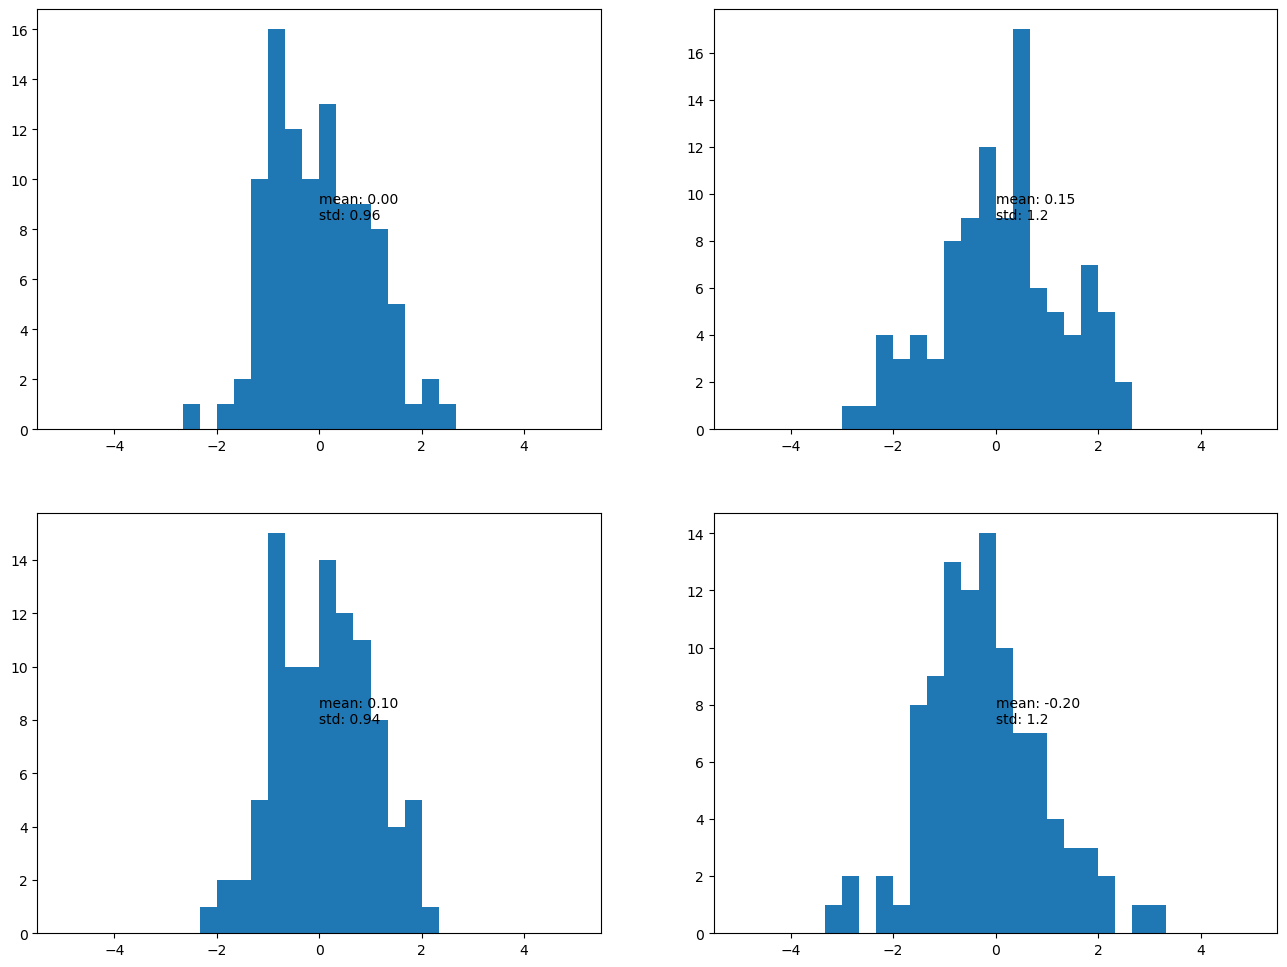

In [15]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8*2, 6*2))

ax1.hist(xp_pull, bins=30, range=(-5, 5))
ax1.text(0.5, 0.5, f"mean: {np.mean(xp_pull):.2f}\nstd: {np.std(xp_pull):.2f}", transform=ax1.transAxes)


ax2.hist(yp_pull, bins=30, range=(-5, 5))
ax2.text(0.5, 0.5, f"mean: {np.mean(yp_pull):.2f}\nstd: {np.std(yp_pull):.2}", transform=ax2.transAxes)

ax3.hist(xm_pull, bins=30, range=(-5, 5))
ax3.text(0.5, 0.5, f"mean: {np.mean(xm_pull):.2f}\nstd: {np.std(xm_pull):.2}", transform=ax3.transAxes)

ax4.hist(ym_pull, bins=30, range=(-5, 5))
ax4.text(0.5, 0.5, f"mean: {np.mean(ym_pull):.2f}\nstd: {np.std(ym_pull):.2}", transform=ax4.transAxes)

In [16]:
result_files = []
for i in range(1, 501):
    result_files.append(f"/dice/users/pc24403/BPGGSZ/sig_only_fit/b2dpi_output_{i}.txt")


In [17]:

foundCKM = False
idx_CKM = 0
cov_string = ""
param_string = ""
log_strings = []
xp_dpi = []
xm_dpi = []
yp_dpi = []
ym_dpi = []

for result_file in result_files:
    idx = 0
    idxs = []
    x = []
    dx = []
    cov = []
    with open(result_file) as f:
        for l in f:
            if 'ValueView' in l:
                a = l.split()
                for i in range(1,7):
                    value = float(a[i][3:])
                    x += [value]
            if 'ErrorView' in l:
                a = l.split()
                for i in range(1,7):
                    error = float(a[i][3:])
                    dx += [error]
                    idxs += [idx]
                    idx +=1
                    idxs += [idx]
                    idx +=1
            log_strings += [l.replace("\n", "")]

    xp_dpi.append(ufloat(x[0], dx[0]))
    xm_dpi.append(ufloat(x[2], dx[2]))
    yp_dpi.append(ufloat(x[1], dx[1]))
    ym_dpi.append(ufloat(x[3], dx[3]))

In [18]:
xp_dpi_pull = []
yp_dpi_pull = []
xm_dpi_pull = []
ym_dpi_pull = []

for i in range(len(xp_dpi)):
    xp_dpi_pull.append((xp_dpi[i].n-x_exp[4])/xp_dpi[i].s)
    yp_dpi_pull.append((yp_dpi[i].n-x_exp[5])/yp_dpi[i].s)
    xm_dpi_pull.append((xm_dpi[i].n-x_exp[6])/xm_dpi[i].s)
    ym_dpi_pull.append((ym_dpi[i].n-x_exp[7])/ym_dpi[i].s)


In [19]:
print(xp_dpi_pull)

[0.03903965116842948, 0.3454972160723765, -1.8641333250936318, -0.6423868921261595, -0.0039094443148057064, -1.3589918847818363, -0.1912681553312933, -0.3590117442000817, -0.15767171973282496, 0.035405953865704075, -0.6425920178566839, 0.0971842262273173, -0.3656011723103534, 0.18081493769845494, -0.5790242532532635, 0.4807602186637201, -1.6347035138777386, -0.00427586582747536, 1.1501996110529484, -1.299296891676495, 1.2765006995583277, 1.7847074084934538, -0.5930214867082867, -1.9211409284740903, -0.06935365016094013, -0.40875869216514965, -0.1288606541345438, 0.7838476370794937, 0.34373901509340826, 0.6317565086445632, 0.17039921749536663, -1.0345305001757918, -0.9226706834853932, -0.5251289047844967, -0.7513175454367396, -0.6736792661173513, 1.005209392411852, 1.690715425154857, 0.18113305279355563, 1.6926183661330332, -0.6478488555356611, -0.5160349557217093, -0.35041848012228866, -0.5306808354128039, 0.025718266425146945, -1.434376837640243, 1.274588373005422, 0.3327150155477728,

Text(0.5, 0.5, 'mean: 0.15\nstd: 0.99')

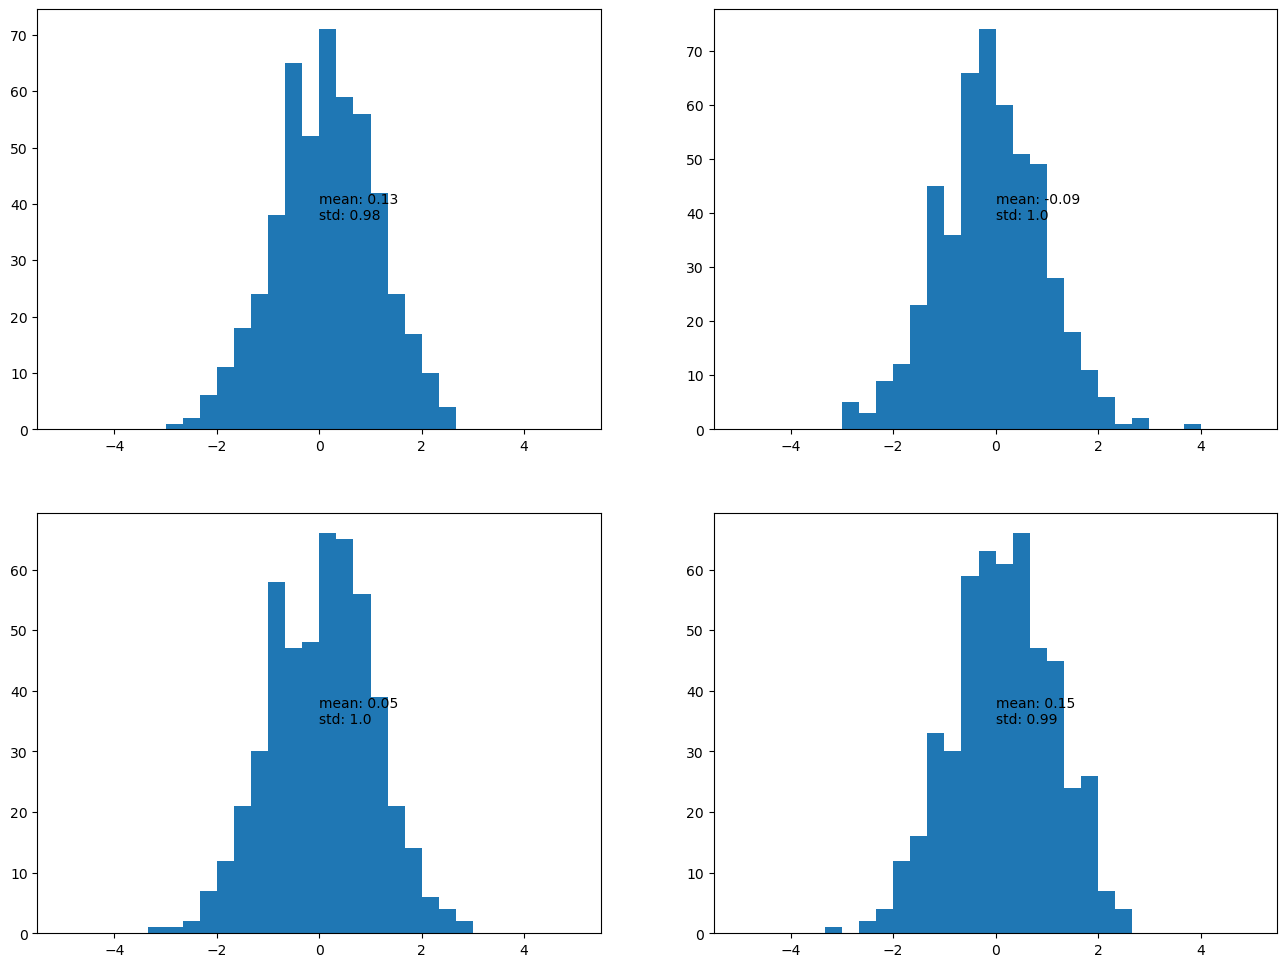

In [20]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8*2, 6*2))

ax1.hist(xp_dpi_pull, bins=30, range=(-5, 5))
ax1.text(0.5, 0.5, f"mean: {np.mean(xp_dpi_pull):.2f}\nstd: {np.std(xp_dpi_pull):.2f}", transform=ax1.transAxes)

ax2.hist(yp_dpi_pull, bins=30, range=(-5, 5))
ax2.text(0.5, 0.5, f"mean: {np.mean(yp_dpi_pull):.2f}\nstd: {np.std(yp_dpi_pull):.2}", transform=ax2.transAxes)

ax3.hist(xm_dpi_pull, bins=30, range=(-5, 5))
ax3.text(0.5, 0.5, f"mean: {np.mean(xm_dpi_pull):.2f}\nstd: {np.std(xm_dpi_pull):.2}", transform=ax3.transAxes)

ax4.hist(ym_dpi_pull, bins=30, range=(-5, 5))
ax4.text(0.5, 0.5, f"mean: {np.mean(ym_dpi_pull):.2f}\nstd: {np.std(ym_dpi_pull):.2}", transform=ax4.transAxes)

In [21]:
idx = 0
idxs = []
x = []
dx = []
cov = []
foundCKM = False
idx_CKM = 0
cov_string = ""
param_string = ""
log_strings = []
with open(result_file) as f:
    for l in f:
        if "│ 0 │ x0 " in l:
            a = l.split()
            value = float(a[5])
            x += [value]
            error = float(a[7])
            dx += [error]
            idxs += [idx]
            idx +=1
        if "│ 1 │ x1 " in l:
            a = l.split()
            value = float(a[5])
            x += [value]
            dx += [error]
            idxs += [idx]                     
            idx += 1
        if "│ 2 │ x2 " in l:
            a = l.split()
            value = float(a[5])
            x += [value]
            dx += [error]
            idxs += [idx]
            idx += 1
        if "│ 3 │ x3 " in l:
            a = l.split()
            value = float(a[5])
            x += [value]
            dx += [error]
            idxs += [idx]
            idx += 1
        log_strings += [l.replace("\n", "")]
xp = ufloat(x[0], dx[0])
xm = ufloat(x[2], dx[2])
yp = ufloat(x[1], dx[1])
ym = ufloat(x[3], dx[3])

a = umath.degrees(0.5 * (umath.atan((-xp * ym + xm * yp)/(xp*xm + yp * ym)) + math.pi))

print("Result is {:.2u}".format(a))

norm = a.n
err = a.s

Result is 53+/-24
